In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [ ]:
print(tf.__version__) #version check

# 1. Load cifar10 dataset

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # data load
x_train, x_test = x_train / 255.0, x_test / 255.0 # data preprocessing

In [ ]:
print(x_train.shape, y_train.shape) #check your data shape

# Cifar 데이터 시각화

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(3,3)
for idx in range(9):
  axes[idx//3, idx%3].imshow(x_train[idx])

# 2. Build your Convolutional Neural Network!

In [ ]:
def build_CNN():
  CNN = tf.keras.models.Sequential()
  CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
  CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
  CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.Flatten())
  CNN.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
  CNN.add(tf.keras.layers.Dense(10, activation='softmax'))

  return CNN

In [ ]:
your_cnn = build_CNN()
your_cnn.build([None, 32, 32, 3])

In [ ]:
your_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = your_cnn.fit(x_train, y_train, epochs=20, validation_split=0.2)

In [ ]:
your_cnn.evaluate(x_test,  y_test, verbose=2) # 테스트

In [ ]:
fig = plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], '-', label='loss')
plt.plot(history.epoch, history.history['val_loss'], '--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
fig = plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], '-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '--', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

# 3.Train your model smarter

모델 학습 시 조금 더 똑똑하게 학습하기 위한 유용한 도구들이 존재합니다.
그 중 하나는 Keras에서는 [Callback함수를 활용](https://https://www.tensorflow.org/guide/keras/train_and_evaluate#%EC%BD%9C%EB%B0%B1_%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)하는 것입니다.

- EarlyStopping : validation loss가 일정 이상 줄어들지 않으면, 학습을 정지합니다.
- ModelCheckpoint : 학습 중 모델을 일정 주기로 모델을 저장합니다.
- TensorBoard : [TensorBoard](https://www.tensorflow.org/tensorboard)에서 읽을 수 있는 형태로 log를 저장합니다.

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
            # Stop training when `val_loss` is no longer improving
            monitor="val_loss",
            # "no longer improving" being defined as "no better than 1e-2 less"
            min_delta=1e-2,
            # "no longer improving" being further defined as "for at least 2 epochs"
            patience=5,
            verbose=1,
        ),
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="step3_{epoch}.h5",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]

### Add Dropout layers

모델의 성능을 개선하기 위해 스케일을 높일 경우 쉽게 과대적합될 수 있습니다.
이것을 피하기 위해 몇 가지 Regularization 기법을 쓸 수 있습니다.
이번에는 Dropout layer를 추가할 것입니다.

In [ ]:
def add_dropout():
  CNN = tf.keras.models.Sequential()
  CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
  CNN.add(tf.keras.layers.Dropout(0.25))
  CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
  CNN.add(tf.keras.layers.Dropout(0.25))
  CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  CNN.add(tf.keras.layers.Dropout(0.25))
  CNN.add(tf.keras.layers.Flatten())
  CNN.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
  CNN.add(tf.keras.layers.Dense(10, activation='softmax'))
  return CNN

In [ ]:
CNN_with_dropout = add_dropout()
CNN_with_dropout.build([None, 32, 32, 3])

In [ ]:
CNN_with_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = CNN_with_dropout.fit(x_train, y_train, epochs=20, validation_split=0.2,
                               callbacks=callbacks)

In [ ]:
fig = plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], '-', label='loss')
plt.plot(history.epoch, history.history['val_loss'], '--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
fig = plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], '-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '--', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
path_to_best_model = "path/to/best/model"
best_model = tf.keras.models.load_model(path_to_best_model)
best_model.evaluate(x_test,  y_test, verbose=2)

# 4. 데이터 파이프라인과 데이터증폭

텐서플로우 데이터 파이프라인은 학습데이터를 design하기 위한 멋진 인터페이스를 제공합니다. 주로 다음과 같은 절차를 밟습니다.

- step 1. 텐서플로우 데이터셋 객체를 만든다.
- step 2. map 함수로 데이터를 전처리한다.
- step 3. 데이터파이프라인을 최적화한다.

In [ ]:
# step 1. 텐서플로우 데이터셋 객체를 만듭니다.

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) 
num_train = len(train_ds)
print("학습데이터 수 : ", num_train)

# 학습셋, 검증셋 스플릿
val_ds = train_ds.take(int(num_train*0.2))
train_ds = train_ds.skip(int(num_train*0.2))

# 테스트셋
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
print(len(train_ds), len(val_ds), len(test_ds))

In [ ]:
# step 2. 데이터를 전처리합니다.

def augment(img,label):
    img = tf.image.resize_with_crop_or_pad(img, 32 + 4, 32 + 4) 
    # Random crop back to the original size
    img = tf.image.random_crop(img, size=[32, 32, 3])
    img = tf.image.random_brightness(img, 0.15)
    img = tf.image.random_saturation(img, lower=0.5, upper=1.5)
    img = tf.image.random_hue(img, 0.2)
    img = tf.image.random_contrast(img, lower=0.5, upper=1.5)
    return img, label

train_ds = train_ds.map(augment)

In [ ]:
# step 3. 파이프라인을 최적화해줍니다.

train_ds = train_ds.shuffle(1000).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(64).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(64)

In [ ]:
CNN_with_dropout = add_dropout()
CNN_with_dropout.build([None, 32, 32, 3])
CNN_with_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
            # Stop training when `val_loss` is no longer improving
            monitor="val_loss",
            # "no longer improving" being defined as "no better than 1e-2 less"
            min_delta=1e-2,
            # "no longer improving" being further defined as "for at least 2 epochs"
            patience=5,
            verbose=1,
        ),
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="step4_{epoch}.h5",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]
history = CNN_with_dropout.fit(train_ds, epochs=40, validation_data=val_ds,
                               callbacks=callbacks)

In [ ]:
fig = plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], '-', label='loss')
plt.plot(history.epoch, history.history['val_loss'], '--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
fig = plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], '-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '--', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
path_to_best_model = "path/to/best/model"
best_model = tf.keras.models.load_model(path_to_best_model)
best_model.evaluate(x_test,  y_test, verbose=2)

# 5. Learning rate scheduler

학습률(learning rate)은 가장 중요한 hyper-parameter 중 하나입니다. 일반적으로 학습초기부터 끝까지 동일한 학습률을 쓰는 것보다 약간씩 감소시키는 것이 더 좋을 수도 있습니다.

In [ ]:
CNN_with_dropout = add_dropout()
CNN_with_dropout.build([None, 32, 32, 3])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.95)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

CNN_with_dropout.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
            # Stop training when `val_loss` is no longer improving
            monitor="val_loss",
            # "no longer improving" being defined as "no better than 1e-2 less"
            min_delta=1e-2,
            # "no longer improving" being further defined as "for at least 2 epochs"
            patience=5,
            verbose=1,
        ),
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="step5_{epoch}.h5",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]
history = CNN_with_dropout.fit(train_ds, epochs=40, validation_data=val_ds,
                               callbacks=callbacks)

In [ ]:
fig = plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], '-', label='loss')
plt.plot(history.epoch, history.history['val_loss'], '--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
fig = plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], '-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '--', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
path_to_best_model = "path/to/best/model"
best_model = tf.keras.models.load_model(path_to_best_model)
best_model.evaluate(x_test,  y_test, verbose=2)

# 6. Transfer learning

In [ ]:
backbone = tf.keras.applications.EfficientNetB0(include_top=False,
                                                   input_shape=(64,64,3),
                                                   weights="imagenet")
# len(resnet_backbone.layers)
# for layer in resnet_backbone.layers[:160]:
#   layer.trainable = False

classifier = tf.keras.Sequential([backbone,
                                  tf.keras.layers.GlobalAveragePooling2D(),
                                  tf.keras.layers.Dense(128),
                                  tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.ReLU(),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(64),
                                  tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.ReLU(),
                                  tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
classifier.summary()

In [ ]:
# step 1. 텐서플로우 데이터셋 객체를 만듭니다.
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # data load
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) 
num_train = len(train_ds)
print("학습데이터 수 : ", num_train)

# 학습셋, 검증셋 스플릿
val_ds = train_ds.take(int(num_train*0.2))
train_ds = train_ds.skip(int(num_train*0.2))

# 테스트셋
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
# step 2. 데이터를 전처리합니다.

def augment(img,label):
    img = tf.image.resize_with_crop_or_pad(img, 32 + 4, 32 + 4) 
    # Random crop back to the original size
    img = tf.image.random_crop(img, size=[32, 32, 3])
    img = tf.image.random_brightness(img, 0.15)
    img = tf.image.random_saturation(img, lower=0.5, upper=1.5)
    img = tf.image.random_hue(img, 0.2)
    img = tf.image.random_contrast(img, lower=0.5, upper=1.5)
    return img, label

def resize_image(img, label):
  img = tf.image.resize(img, [64,64], method='bicubic')
  img = tf.keras.applications.efficientnet.preprocess_input(img)
  return img, label

train_ds = train_ds.map(augment,num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(resize_image)

In [ ]:
# step 3. 파이프라인을 최적화해줍니다.

train_ds = train_ds.shuffle(1000).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(64).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(64)

In [7]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=200,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(lr_schedule)

classifier.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
            # Stop training when `val_loss` is no longer improving
            monitor="val_loss",
            # "no longer improving" being defined as "no better than 1e-2 less"
            min_delta=0.0,
            # "no longer improving" being further defined as "for at least 2 epochs"
            patience=5,
            verbose=1,
        ),
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="step6_{epoch}.h5",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]
history = classifier.fit(train_ds, epochs=40, validation_data=val_ds,
                               callbacks=callbacks)

Epoch 1/40
625/625 [==============================] - ETA: 0s - loss: 0.8188 - accuracy: 0.7284
Epoch 00001: val_loss improved from inf to 0.41169, saving model to step6_1.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


625/625 [==============================] - 134s 193ms/step - loss: 0.8188 - accuracy: 0.7284 - val_loss: 0.4117 - val_accuracy: 0.8611
Epoch 2/40
625/625 [==============================] - ETA: 0s - loss: 0.4544 - accuracy: 0.8485
Epoch 00002: val_loss improved from 0.41169 to 0.31369, saving model to step6_2.h5
625/625 [==============================] - 120s 191ms/step - loss: 0.4544 - accuracy: 0.8485 - val_loss: 0.3137 - val_accuracy: 0.8957
Epoch 3/40
625/625 [==============================] - ETA: 0s - loss: 0.3434 - accuracy: 0.8841
Epoch 00003: val_loss improved from 0.31369 to 0.27141, saving model to step6_3.h5
625/625 [==============================] - 121s 193ms/step - loss: 0.3434 - accuracy: 0.8841 - val_loss: 0.2714 - val_accuracy: 0.9103
Epoch 4/40
625/625 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.9113
Epoch 00004: val_loss improved from 0.27141 to 0.24079, saving model to step6_4.h5
625/625 [==============================] - 120s 192ms/step

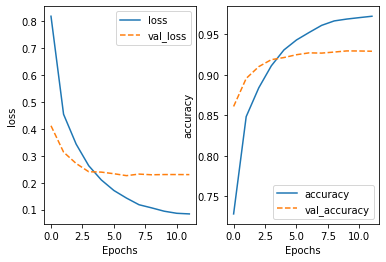

In [8]:
from matplotlib import pyplot as plt

fig = plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], '-', label='loss')
plt.plot(history.epoch, history.history['val_loss'], '--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
fig = plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], '-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '--', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [9]:
path_to_best_model = "/content/step6_7.h5"
best_model = tf.keras.models.load_model(path_to_best_model)
best_model.evaluate(test_ds, verbose=2)

157/157 - 9s - loss: 0.3046 - accuracy: 0.9020 - 9s/epoch - 59ms/step


[0.3046385943889618, 0.9020000100135803]